# How does supervised machine learning work?
Supervised machine learning takes places in two steps - the *training* phase, and the *testing* phase.  In the training phase, you use a portion of your data to *train* your algorithm (which, in our case, is a classification algorithm).  You provide both your feature vector and your labels to the algorithm, and the algorithm searches for patterns in your data that can help associate it with a particular label.

In the testing phase, we use the classifier we trained in the previous step, and give it previously unseen feature vectors representing unseen data to the algorithm, and have the algorithm predict the label.  We can then compare the "true" label to the predicted label, and see if our classifier provides us with a good and generlizable way of accomplishing the task (in our case, the task of automatically distinguishing news sentences from romance sentences).

![imagemlsteps](images/mlsteps.png)
Source: Andrew Rosenberg


It's important to remember that we cannot use the same data we used to build the classifier to test the data; if we did, our classifier would be 100% correct all of the time!  This will not tell us how our trained classifer will perform on new, unseen data.  We therefore need to split our data into a *train set* and a *test set*.
- We will use the train set data to train our classifier
- We will use the test set data to test our classifier

First, we need to load in the Python libraries that we will be using for our analysis. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import numpy as np

### Read data in from a spreadsheet
Lets take the data we just saved out and load it back into a dataframe so that we can do some analysis with it!

In [4]:
df = pd.read_csv("df_news_romance.csv")

### Preparing data for machine learning
We're almost ready to do some machine learning!  First, we need to split our data into *feature vectors* and *labels*.  We need them separated to train the classifier.  Remember, the features we are using to train our classifier are numbers of nouns, adjectives, and adverbs are in each sentence.  (We are not using the sentences themselves as features!)

In [5]:
fv = df[["NN", "JJ"]]
fv.head()

,NN,JJ
0,11,2
1,13,2
2,16,2
3,9,3
4,5,3


In [6]:
df['label'].value_counts()

news       4623
romance    4431
Name: label, dtype: int64

We have more news sentences than romance sentences; this is not a problem, but it's something to take note of during evaluation.


### Partitioning data into train and test sets
When you are partitioning your data into train and test sets, a good place to start is to use 75% of your data for training,and 25% of your data for testing.  We want as much training data as possible, while also having enough testing data to ensure that our trained classifier is generalizable across a number of examples.  This will also lead to more accurate evalutation of our trained classifier.

Fortunately, sklearn has a function that will do exactly this!

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fv, df['label'],
                                                stratify=df['label'], 
                                                test_size=0.25,
                                                random_state = 42)

- We use the "stratify" argument because we have an uneven amount of training data; we have more news sentances than romance sentences.  By using stratify, we ensure that our classifier will take this data imbalence into account.


- In this example, we are using a fixed random state, to ensure we will always get exactly the same value when we classify.  Adding this argument is unnecessary for most types of classification; we do it here to ensure our results do not vary slightly across runs.

Let's check the size of our train and test datasets using the `.shape` attribute of train and test data. 

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6790, 2) (6790,)
(2264, 2) (2264,)


### What classifier do I use?
Chosing a classifier can be a challenging task.  However, this flowchart can give you an idea of where to start!

![algorithms_cheatsheet](images/algorithms_cheatsheet.png)
Source: Andreas Mueller


According to this, we are going to use LinearSVC, which is a linear model for classification that separates classes using a line, a plane, or a hyperplane. SVC stands for "Support Vector Classifier", which is a type of support vector machine algorithm.


### An animated example of classification 
The following animated GIF shows an example of linear classification.

![croppedml](images/croppedml.gif)

Source: Andrew Rosenberg

## Let's build a classification algorithm with sklearn!
One of the best things about sklearn is the simplicity of its syntax.


To do machine learning with sklearn, follow these five steps (the function names remain the same, regardless of the classifier you use!):

### Step 1:  Import your desired classifier

In [9]:
from sklearn.svm import LinearSVC

### Step 2: Create an instance of your machine learning algorithm

In [10]:
classifier = LinearSVC(random_state=42)

### Step 3:  Fit your data to your classifier (train)

In [11]:
classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

**Step 3b: Visualize the decision boundary**

To visualize the decision boundary, we plot a set of contours. Any points within contours belonging to a shared color family, for example shades of blue, are assigned to the class denoted by that color. A lighter color indicates less certainity that the point belongs in that class. In this example, news is blue and romance is orange. This example only has 2 features; to visualize datasets with more often requires using a dimension reduction algorithim to find a 2D representation of the data. 

We make `plot_boundary` a function because we will reuse it on the test data. `ListedColormap` and accessing colors using colormap indexing (`mcm.tab20c(1)`) is used to match the background colors to the colors we have been using for the feature vector. We then use the `Normalize` function to center the colors around the decision boundary. You can also use an out of the box colormap, listed at https://matplotlib.org/examples/color/colormaps_reference.html

In [12]:
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
tabcm = mcolors.ListedColormap([mcm.tab20c(0), mcm.tab20c(1), mcm.tab20c(2), mcm.tab20c(3),
                                mcm.tab20c(7), mcm.tab20c(6), mcm.tab20c(5), mcm.tab20c(4)])
norm = mcolors.Normalize(-7,7) 

In [15]:
np.random.seed(42)

def jitter(arr):
    scale = .01*(arr.min() - arr.max())
    return arr + np.random.randn(arr.shape[0]) * scale

def plot_boundary(ax, clf, Xt, Xs, ys, title):
    # using all the data, create a meshgrid for the decision boundary
    h = .02
    x_min, x_max = Xt['NN'].values.min() - 1, Xt['NN'].values.max() + 1
    y_min, y_max = Xt['JJ'].values.min() - 1, Xt['JJ'].values.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    im = ax.contourf(xx, yy, Z, cmap=tabcm, norm=norm, alpha=.5)
    
    #plot the decision boundary
    ax.contour(xx, yy, Z, colors='k', linewidths=3, levels=[-1, 0, 1],
               linestyles=['--', '-', '--'], alpha=.5, zorder=20)
    
    # plot and label the data
    ax.scatter(jitter(Xs['NN'][ys=="news"]), jitter(Xs['JJ'][ys=="news"]), 
                color="tab:blue", label="news", edgecolor='k', alpha=.5)
    ax.scatter(jitter(Xs['NN'][ys=="romance"]), jitter(Xs['JJ'][ys=="romance"]), 
               color="tab:orange", label="romance", edgecolor='k', alpha=.5)
    
   

    ax.set_title(title)
    ax.set_xlabel("nouns")
    ax.set_ylabel("adjectives")
    
    # set the axes boundaries against the whole dataset
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_aspect("equal")

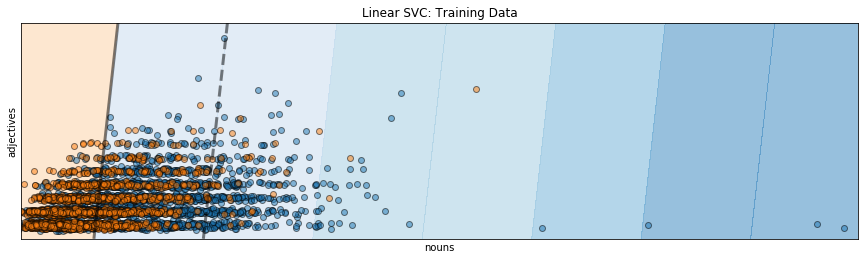

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
plot_boundary(ax, classifier, fv, X_train, y_train, "Linear SVC: Training Data")

### Step 4:  Predict labels for unseen data (test)

In [17]:
y_predict = classifier.predict(X_test)

### Step 5: Score!
Evaluate the skill of the model by computing the 
* score: how many predicted labels are the same as the actual labels 
* confusion matrix: true positive, false positive, false negative, and true negative counts

In [18]:
classifier.score(X_test, y_test)

0.70759717314487636

Right now, our classifier can predict previously unseen news and data 

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test, y_predict)

array([[747, 409],
       [253, 855]])


|      |actual news | actual romance |
|:--: | :--:| :--:|
|predicted news | 747 | 409 |
|predicted romance|253 | 855|

## Visualization of the decision boundaries

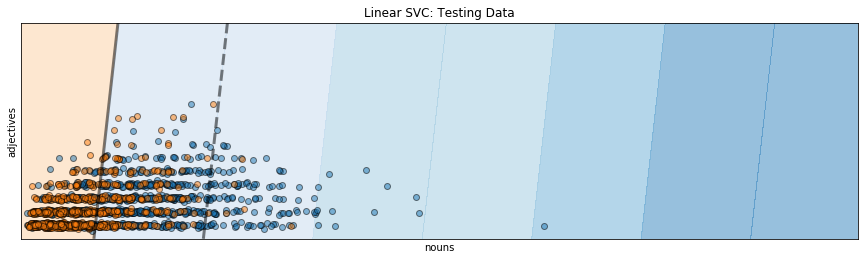

In [21]:
#let's make the plot
fig, ax = plt.subplots(figsize=(15,10))
plot_boundary(ax, classifier, fv, X_test, y_test, "Linear SVC: Testing Data")

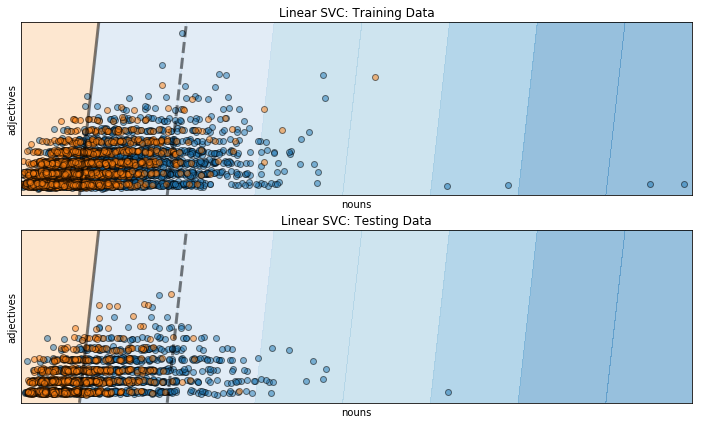

In [22]:
fig, (ax1, ax2) = plt.subplots(figsize=(15,7), nrows=2)
plot_boundary(ax1, classifier, fv, X_train, y_train, "Linear SVC: Training Data")
plot_boundary(ax2, classifier, fv, X_test, y_test, "Linear SVC: Testing Data")

# Test the visualization code because it looks incorrect

In [23]:
from sklearn.datasets import make_classification

# generate well seperated data
X_dummy, y_dummy = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X_dummy += 2 * rng.uniform(size=X_dummy.shape)


In [24]:
# pack it into a dataframe of the same structure 
test_df = pd.DataFrame(({'NN':X_dummy[:,0], 'JJ':X_dummy[:,1], 'lab':y_dummy}))
test_df['label'] = test_df['lab'].replace({0:'news', 1:'romance'})

In [25]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(test_df[['NN','JJ']], test_df['label'], 
                                                    test_size=.4, random_state=42)
classifier = LinearSVC(random_state=42)
classifier.fit(X_train_d, y_train_d)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [26]:
classifier.score(X_test_d, y_test_d)

0.94999999999999996

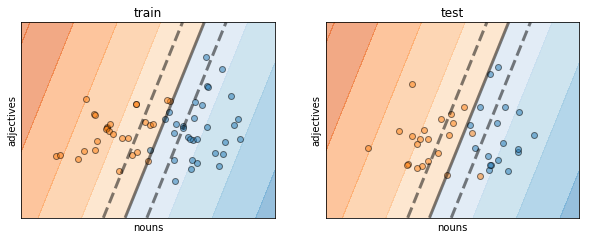

In [27]:
fig, (ax1, ax2) = plt.subplots(figsize=(10,5), ncols=2)
plot_boundary(ax1, classifier, test_df[['NN','JJ']], X_train_d, y_train_d, "train")
plot_boundary(ax2, classifier, test_df[['NN','JJ']], X_test_d, y_test_d, "test")